In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [32]:
df=pd.read_csv("credit_risk_dataset.csv")
print(df.head())
print(df.describe())
print(df.info())
print(df.isnull().sum())

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


In [33]:
df.fillna(df.median(numeric_only=True), inplace=True)
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    for col in cat_cols:
        df[col] = df[col].astype('category').cat.codes
print(df.isnull().sum())

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [34]:
X = df.drop('loan_status', axis=1)  
y = df['loan_status']           


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
model= RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
y_pred = model.predict(X_test)

In [38]:
print("Accuracy", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy 0.9297222648457879
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96      5072
           1       0.96      0.71      0.82      1445

    accuracy                           0.93      6517
   macro avg       0.94      0.85      0.89      6517
weighted avg       0.93      0.93      0.93      6517

Confusion Matrix:
 [[5034   38]
 [ 420 1025]]


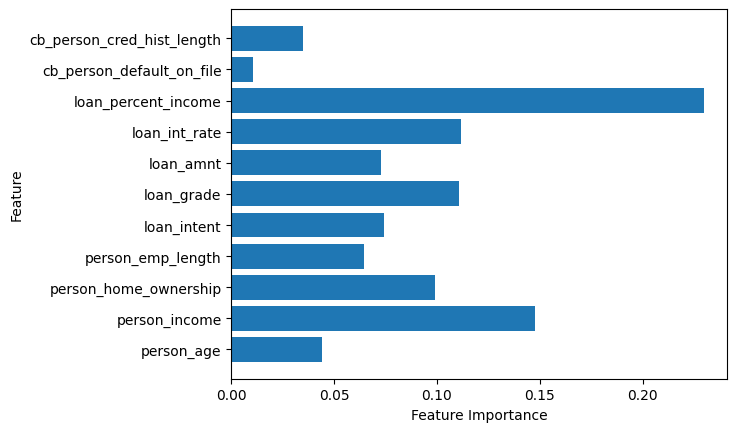

In [39]:
importances =model.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()

In [40]:
import joblib
joblib.dump(model, 'CreditRiskDetector_RF.joblib')

['CreditRiskDetector_RF.joblib']